Lets us download and examine the date to further explore and analyse

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O netflix.csv

--2023-02-19 09:07:22--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 52.222.232.229, 52.222.232.30, 52.222.232.69, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|52.222.232.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.06s   

2023-02-19 09:07:22 (58.4 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [ ]:
!ls

netflix.csv  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('netflix.csv')

# 1. Defining Problem Statement and Analysing basic metrics

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


When we look into the Data we can see following points:

1) Columns like cast, listed_in, country has nested data.


2) Data columns like directors, casts, country, date_added, rating and duration has null values.

3)Except release_year (data type = int) all other columns have same dataype {Object}.

Problem Statement 1) 

                  Let us look into nested data and pivot it so we can visualise better

In [ ]:
data_cast = data['cast'].apply(lambda x:str(x).split(',')).tolist()
df_cast = pd.DataFrame(data_cast, index = data['title'])
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast)
df_cast.reset_index(inplace = True)
df_cast = df_cast[['title',0]]
df_cast.columns = ['title', 'cast']

In [ ]:
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


As you can see we have created a new dataframe with just title and cast. Similarly we will have to perform the same operations on other columns and get indivisual data

In [ ]:
data_dir = data['director'].apply(lambda x:str(x).split(',')).tolist()
df_dir = pd.DataFrame(data_dir, index = data['title'])
df_dir = df_dir.stack()
df_dir = pd.DataFrame(df_dir)
df_dir.reset_index(inplace = True)
df_dir = df_dir[['title',0]]
df_dir.rename(columns ={'title':'title', 0:'director'}, inplace = True)

In [ ]:
data_country = data['country'].apply(lambda x:str(x).split(',')).tolist()
df_country = pd.DataFrame(data_country, index = data['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace = True)
df_country = df_country[['title',0]]
df_country.rename(columns ={'title':'title', 0:'director'}, inplace = True)

In [ ]:
data_listed_in = data['listed_in'].apply(lambda x:str(x).split(',')).tolist()
df_listed_in = pd.DataFrame(data_listed_in, index = data['title'])
df_listed_in = df_listed_in.stack()
df_listed_in = pd.DataFrame(df_listed_in)
df_listed_in.reset_index(inplace = True)
df_listed_in = df_listed_in[['title',0]]
df_listed_in.rename(columns ={'title':'title', 0:'director'}, inplace = True)

Since we have unnest the data making each columns an indivisual dataframe. Let us merge with the original one.
Before performing the merge operation let us also remove few columns from the original dataframe to avoid confusion. (We will be removing director, cast, country and listed_in from the original dataframe and performing the merge operation)

In [ ]:
data.drop(['director',	'cast',	'country', 'listed_in'], axis = 1, inplace = True)


In [ ]:
data.head()  ## You can see we have dropped the columns as discussed earlier

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...


In [ ]:
## now joining all the dataframes at once
from functools import reduce

In [ ]:
data_frames = [data,df_cast,df_dir, df_country,df_listed_in]
data_refined = reduce(lambda  left,right: pd.merge(left,right,on=['title'],
                                            how='inner'), data_frames)

In [ ]:
data_refined.head() ## Let us rename the column and sort them as per the original dataframe

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director_x,director_y,director
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows


In [ ]:
data_refined.rename(columns = {'director_x':'director',	'director_y':'country', 'director':'listed_in'}, inplace = True)

In [ ]:
data_refined = data_refined[['show_id', 'type','title','director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 
                             'listed_in','description']]

In [ ]:
data_refined.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
data_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      202065 non-null  object
 4   cast          202065 non-null  object
 5   country       202065 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


Above two codes i.e data_refined.head() and data_refined.info() shows us that though the columns are unnested however if we look carefull the 'nan' it shows is not null value but an object data type.

So let us replace 'nan' with np.nan and try to fill the null values.

In [ ]:
data_refined = data_refined.replace('nan', np.nan)

In [ ]:
data_refined.info()  ## Now if we observe below, they have assigned object type 'nan' to np.nan(a null value)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      151422 non-null  object
 4   cast          199916 non-null  object
 5   country       190168 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


Let us now fill the null values for better analysis and outcomes. We will use mode & groupby to better fill the null values

Note:- We will make copy of the current dataframe and fill the null values (This may help us to gather more insights)

In [ ]:
data_refined['country'] = data_refined.groupby(['director', 'cast'], dropna=False)['country']\
                             .transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else "Empty") 

In [ ]:
data_refined['cast'] = data_refined.groupby(['country','listed_in'], dropna=False)['cast']\
                                .transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else "Empty")

In [ ]:
data_refined['director'] = data_refined.groupby(['country','listed_in'], dropna=False)['director']\
                               .transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else "Empty")

In [ ]:
data_refined=data_refined.replace('Empty',np.nan)

Now if you observe carefully, directors in data_refined.info() and data_refined_nonnull.info() there has few of the missing directors column has been filled with respective modes

## 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
data_refined.shape

(202065, 12)

In [ ]:
data_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      189012 non-null  object
 4   cast          201856 non-null  object
 5   country       192469 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


If we look in info, we can see there are still missing values in directors, country, and date added.

Also let us convert date_added to datetime so we can extract some insigts from it

In [ ]:
data_refined['date_added']=pd.to_datetime(data_refined['date_added'])

In [ ]:
data_refined['year_added'] = data_refined['date_added'].dt.year

In [ ]:
data_refined.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0


Statistical Summary on data given below

In [ ]:
data_refined.describe()

,release_year,year_added
count,202065.000000,201907.000000
mean,2013.448950,2018.965440
std,9.013616,1.551654
min,1925.000000,2008.000000
25%,2012.000000,2018.000000
50%,2016.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


In [ ]:
data_refined.describe(include = 'object')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,202065,202065,202065,189012,201856,192469,201998,202062,202065,202065
unique,8807,2,8807,5120,39296,197,17,220,73,8775
top,s7165,Movie,Kahlil Gibran's The Prophet,Yasuhiro Irie,Samuel West,United States,TV-MA,1 Season,International Movies,A troubled young girl and her mother find sola...
freq,700,145917,700,3226,344,50432,73915,35035,27141,700


We can observe that data set has release years from 1925 to 2021 and has maximum data of year- 2019

Also you can observe unique directors, casts' country it was release to, and the top director cast movies, countries etc.

# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
data_refined['director'].value_counts()

Yasuhiro Irie      3226
Danny Cannon       2797
Noam Murro         2482
Shin Won-ho        2415
Kenny Ortega       1561
                   ... 
Ari Levinson          1
Tony Zierra           1
Andrew Renzi          1
 Toby Trackman        1
Kirsten Johnson       1
Name: director, Length: 5120, dtype: int64

In [ ]:
data_refined['cast'].value_counts()

Samuel West           344
David Attenborough    270
 Alfred Molina        160
 Anupam Kher          133
 Salma Hayek          130
                     ... 
Christoph Niemann       1
 Tinker Hatfield        1
 Es Devlin              1
 Bjarke Ingels          1
 Brynna Drummond        1
Name: cast, Length: 39296, dtype: int64

In [ ]:
data_refined['listed_in'].value_counts()

 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed_in, Length: 73, dtype: int64

In [ ]:
data_refined['country'].value_counts()

United States     50432
India             22600
United Kingdom     9751
 United States     9504
Japan              7595
                  ...  
 Ukraine              2
 Palestine            2
 Kazakhstan           1
 Nicaragua            1
 Uganda               1
Name: country, Length: 197, dtype: int64

Above code we can see there are two columns in country as 'United States'

In [ ]:
data_refined['country'].replace(' United States', 'United States', inplace = True)

In [ ]:
data_refined[['director','cast','country','listed_in']].value_counts()

director            cast                country         listed_in       
Ken Burns            Lena Waithe        United States   Docuseries          79
 Barbara Schroeder  David Attenborough  United States    Docuseries         42
Michael Simon        Adriano Zumbo      United States   Reality TV          40
Danny Cannon         Deborah Ann Woll   United States   Crime TV Shows      38
Noam Murro          David Attenborough  United Kingdom  British TV Shows    35
                                                                            ..
Evan Katz            Gary Cole          Canada          Dramas               1
                                        United States    Thrillers           1
                                                        Dramas               1
                     Jacki Weaver       Canada           Thrillers           1
Şenol Sönmez        Murat Boz           Turkey          Comedies             1
Length: 170052, dtype: int64

We can observe that Yasuhiro Irie has directed/worked on most of movies/TV Shows as director, similarly most of the movies/TV Shows were release in United States followed by India and most of the movies are listed in 'International Movies'. 

Samuel West seems to be the actions with higest counts.

If we look them together we can find the actor director preferences in different countries with their genre defined.

Now for the unique attibutes

In [ ]:
data_refined.nunique()

show_id          8807
type                2
title            8807
director         5120
cast            39296
country           196
date_added       1714
release_year       74
rating             17
duration          220
listed_in          73
description      8775
year_added         14
dtype: int64

similary we can find values, unique values, min max using describe as shown above

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Let us first see the count of movies and tv shows released

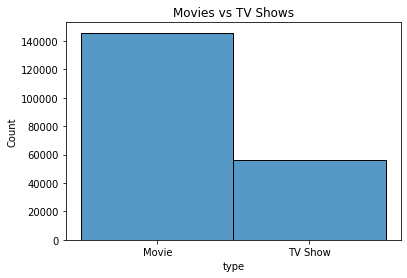

In [ ]:
sns.histplot(data_refined, x = 'type', binwidth = 3)
plt.title('Movies vs TV Shows')
plt.show()

The below plot shows how movies started releasing there content over OTT platform and in 2016-2020 netflix became a popular OTT platform with max number of shows and movies being released

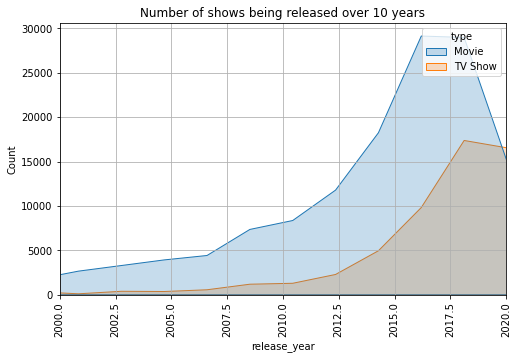

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data = data_refined, x = 'release_year',  hue = 'type',bins = 50, element="poly")
plt.xticks(rotation = 90)
plt.title('Number of shows being released over 10 years')
plt.xlim(2000,2020)
plt.grid()
plt.show()

Let us see the movies/tv shows released in US VS India (two of the most popular countries where most of the movies/shows were released)

In [ ]:
top_five = data_refined.loc[data_refined['country'].isin(['India','United States', 'United Kingdom', 'Japan','South Korea '])]

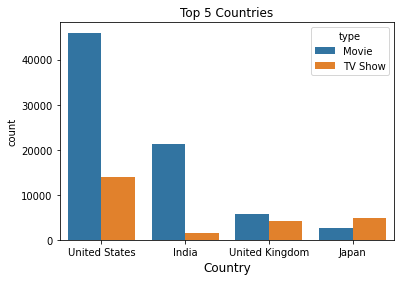

In [ ]:
sns.countplot(x = 'country',data = top_five, hue = 'type')
plt.xlabel('Country', fontsize = 12)
plt.title('Top 5 Countries')
plt.show()

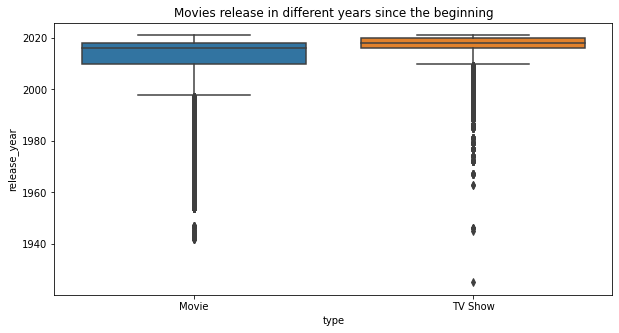

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'type', y = 'release_year', data = data_refined)
plt.title('Movies release in different years since the beginning')
plt.show()

Pair Plot

<Figure size 1080x576 with 0 Axes>

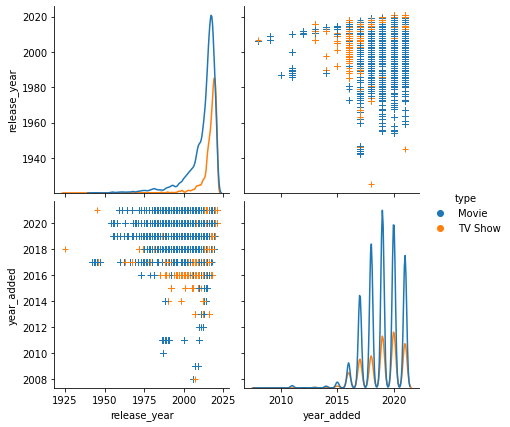

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(data = data_refined, hue = 'type', plot_kws=dict(marker="+", linewidth=1),
             diag_kws=dict(fill=False), height=3)
plt.show()

Heat Map

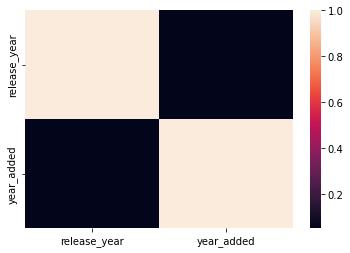

In [ ]:
sns.heatmap(data_refined.corr())
plt.show()

Please note: Since there are less numeric value in the data, heatmap and pairplot are not that efficient

# Missing Value & Outlier check (Treatment optional)

In [ ]:
np.any(data_refined.isna())

True

In [ ]:
data_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      189012 non-null  object        
 4   cast          201856 non-null  object        
 5   country       192469 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
 12  year_added    201907 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 29.6+ MB


When we check df.info(), we kind of see the missing value, also below code helps us filter particular column with null values

In [ ]:
filtered_director = data_refined[data_refined['director'].isnull()]

Similarly we can filter for other columns and check null values

In [ ]:
filtered_director

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0
5,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201854,s8798,TV Show,Zak Storm,NaN,Christopher Smith,Indonesia,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0
201858,s8798,TV Show,Zak Storm,NaN,Max Mittelman,Indonesia,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0
201862,s8798,TV Show,Zak Storm,NaN,Reba Buhr,Indonesia,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0
201866,s8798,TV Show,Zak Storm,NaN,Kyle Hebert,Indonesia,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0


We had already treated the original data with mode values grouping by columns that might be related to each other. Even though we still have null values, we can still fill the missing values by mode of that particular column however that will completely change the data accuracy as mode of that particular column will be decided on the frequency. 

For example:-if we take df['director'].mode, will see that Yasuhire Irie has most number of frequency, however we cannot fill all the columns with Yashuhire as he may not direct movies from other countries.

In [ ]:
data_refined['director'].mode()

0    Yasuhiro Irie
dtype: object

We can use quantile and filter outliers using below code

In [ ]:
high = data_refined['release_year'].quantile(0.99)

In [ ]:
low = data_refined['release_year'].quantile(0.1)

In [ ]:
data_filtered = data_refined[(data_refined['release_year']<high) & (data_refined['release_year']>low)]

In [ ]:
data_filtered

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
514,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Pedro de Echave García,Michael Schumacher,NaN,2021-09-22,2020,TV-MA,67 min,Documentaries,Declassified documents reveal the post-WWII li...,2021.0
515,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Pedro de Echave García,Toyin Abraham,NaN,2021-09-22,2020,TV-MA,67 min,International Movies,Declassified documents reveal the post-WWII li...,2021.0
516,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Pablo Azorín Williams,Michael Schumacher,NaN,2021-09-22,2020,TV-MA,67 min,Documentaries,Declassified documents reveal the post-WWII li...,2021.0
517,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Pablo Azorín Williams,Toyin Abraham,NaN,2021-09-22,2020,TV-MA,67 min,International Movies,Declassified documents reveal the post-WWII li...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019.0
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019.0
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0


We can also use scatter plots or box plot to identify the outliers.

For example

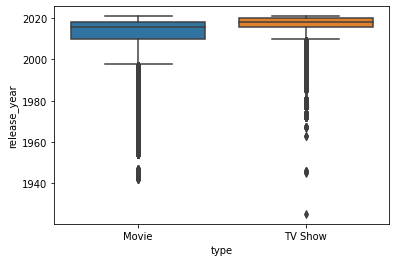

In [ ]:
sns.boxplot(x = 'type', y = 'release_year', data = data_refined)

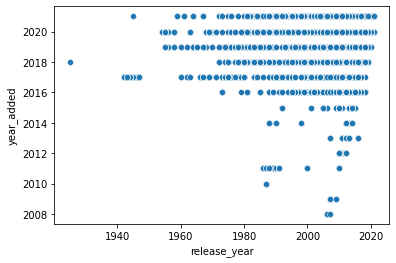

In [ ]:
sns.scatterplot(x = 'release_year',y = 'year_added', data = data_refined)

# Insights based on Non-Graphical and Visual Analysis 

1) Univariate non-graphical

Show ID

In [ ]:
data_refined['show_id'].nunique() ## shows how many unique Show_ids are there

8807

In [ ]:
data_refined['show_id'].value_counts() ## shows how many subset of one particular show ID are there

s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s6330      1
s8176      1
s937       1
s3387      1
s1         1
Name: show_id, Length: 8807, dtype: int64

In [ ]:
data_refined['show_id'].value_counts().min() ## check the minimum count of a particular show id

1

In [ ]:
data_refined['show_id'].value_counts().max() ## check the maximum count of a particular show ID

700

Title

In [ ]:
data_refined['title'].nunique()

8807

In [ ]:
data_refined['title'].value_counts()

Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Blackfish                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: title, Length: 8807, dtype: int64

Director

In [ ]:
data_refined['director'].nunique()

5120

In [ ]:
data_refined.duplicated(subset=['director'], keep = 'first')

0         False
1         False
2          True
3          True
4          True
          ...  
202060     True
202061     True
202062     True
202063     True
202064     True
Length: 202065, dtype: bool

In [ ]:
data_refined['director'].value_counts()

Yasuhiro Irie      3226
Danny Cannon       2797
Noam Murro         2482
Shin Won-ho        2415
Kenny Ortega       1561
                   ... 
Ari Levinson          1
Tony Zierra           1
Andrew Renzi          1
 Toby Trackman        1
Kirsten Johnson       1
Name: director, Length: 5120, dtype: int64

In [ ]:
data_refined['director'].value_counts().min()

1

In [ ]:
data_refined['director'].value_counts().max()

3226

In [ ]:
data_refined['director'].mode() # top frequency of the director

0    Yasuhiro Irie
dtype: object

Cast

In [ ]:
data_refined['cast'].nunique()

39296

In [ ]:
data_refined['cast'].value_counts()

Samuel West           344
David Attenborough    270
 Alfred Molina        160
 Anupam Kher          133
 Salma Hayek          130
                     ... 
Christoph Niemann       1
 Tinker Hatfield        1
 Es Devlin              1
 Bjarke Ingels          1
 Brynna Drummond        1
Name: cast, Length: 39296, dtype: int64

In [ ]:
data_refined['cast'].value_counts().min()

1

In [ ]:
data_refined['cast'].value_counts().max()

344

In [ ]:
data_refined['cast'].mode() 

0    Samuel West
dtype: object

Country

In [ ]:
data_refined['country'].nunique()

39296

In [ ]:
data_refined['country'].value_counts()

United States     59936
India             22600
United Kingdom     9751
Japan              7595
South Korea        4732
                  ...  
Greece                2
 Sri Lanka            2
 Nicaragua            1
 Uganda               1
 Kazakhstan           1
Name: country, Length: 196, dtype: int64

In [ ]:
data_refined['country'].value_counts().min()

1

In [ ]:
data_refined['country'].value_counts().max()

59936

In [ ]:
data_refined['country'].mode()

0    United States
dtype: object

Release_year

In [ ]:
data_refined['release_year'].nunique()

74

In [ ]:
data['release_year'].value_counts() ## No need to use data_refined as there were no nested Release Years in original dataset

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
x = data.sort_values(['release_year']).head(1) ## check the outlier/earliest release_year
x['release_year']

4250    1925
Name: release_year, dtype: int64

In [ ]:
y = data.sort_values(['release_year'], ascending = False).head(1) ## check the outlier/latest release_year
y['release_year']

693    2021
Name: release_year, dtype: int64

Rating

In [ ]:
data_refined['rating'].nunique()

17

In [ ]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

listed_in	

In [ ]:
data_refined['listed_in'].nunique()

73

In [ ]:
data_refined['listed_in'].value_counts()

 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed_in, Length: 73, dtype: int64

In [ ]:
data_refined.info() # to check all the datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      189012 non-null  object        
 4   cast          201856 non-null  object        
 5   country       192469 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
 12  year_added    201907 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 29.6+ MB


In [ ]:
## We can visualize and find the top in all category. The unique number of values each categories has. The range of each attributes, using mean and max.
##Check the frequencey using mode, sort years to see early and lastest years when the movie was released

Univariate Visual Analysis

In [ ]:
dir = pd.DataFrame(data_refined['director'].value_counts().head())
dir.reset_index(inplace = True)
dir.rename(columns={'index':'director', 'director':'count'}, inplace = True)
top_directors = data_refined.loc[data_refined['director'].isin(dir['director'])]

In [ ]:
cast = pd.DataFrame(data_refined['cast'].value_counts().head())
cast.reset_index(inplace = True)
cast.rename(columns={'index':'cast', 'cast':'count'}, inplace = True)
top_cast = data_refined.loc[data_refined['cast'].isin(cast['cast'])]

In [ ]:
listed = pd.DataFrame(data_refined['listed_in'].value_counts().head())
listed.reset_index(inplace = True)
listed.rename(columns={'index':'listed_in', 'listed_in':'count'}, inplace = True)
top_list = data_refined.loc[data_refined['listed_in'].isin(listed['listed_in'])]

In [ ]:
country = pd.DataFrame(data_refined['country'].value_counts().head())
country.reset_index(inplace = True)
country.rename(columns={'index':'country', 'country':'count'}, inplace = True)
top_country = data_refined.loc[data_refined['country'].isin(country['country'])]

In [ ]:
rating = pd.DataFrame(data_refined['rating'].value_counts().head())
rating.reset_index(inplace = True)
rating.rename(columns={'index':'rating', 'rating':'count'}, inplace = True)
top_rating = data_refined.loc[data_refined['rating'].isin(rating['rating'])]

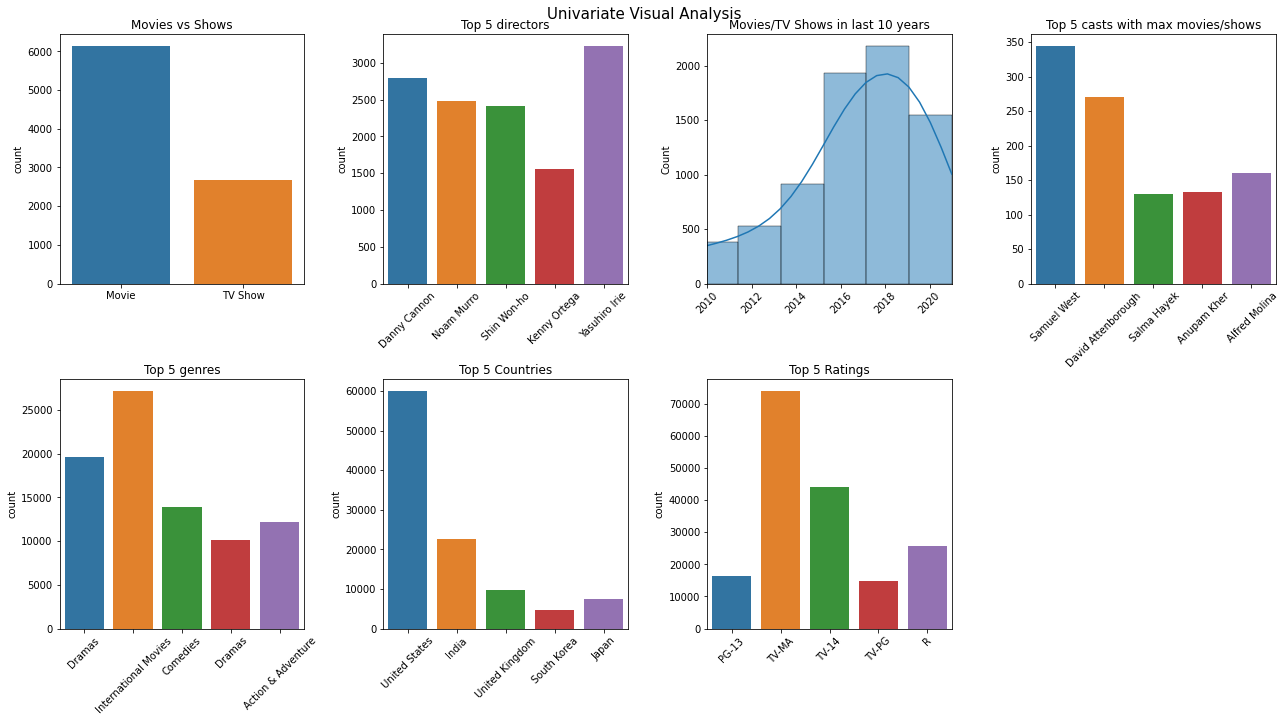

In [ ]:
fig = plt.figure(figsize = (18,10))

plt.subplot(2,4,1)
sns.countplot(x = 'type', data = data)
plt.title('Movies vs Shows')
plt.xlabel("")

plt.subplot(2,4,2)
sns.countplot(x = 'director',  data = top_directors)
plt.title('Top 5 directors')
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplot(2,4,3)
sns.histplot(data = data, x ='release_year', bins= 50, kde=True)
plt.title('Movies/TV Shows in last 10 years')
plt.xticks(rotation = 45)
plt.xlabel("")
plt.xlim(2010,2021)

plt.subplot(2,4,4)
sns.countplot( x ='cast', data = top_cast)
plt.title('Top 5 casts with max movies/shows')
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplot(2,4,5)
sns.countplot( x ='listed_in', data = top_list)
plt.title('Top 5 genres')
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplot(2,4,6)
sns.countplot( x ='country', data = top_country)
plt.title('Top 5 Countries')
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplot(2,4,7)
sns.countplot( x ='rating', data = top_rating)
plt.title('Top 5 Ratings')
plt.xticks(rotation = 45)
plt.xlabel("")


fig.suptitle("Univariate Visual Analysis",  ha = 'center', va = 'bottom', fontsize = 15)
plt.tight_layout()
plt.show()

Following are the observation:

1) Most movies are added than TV shows

2)Yashuro Irie has directed most of movies/shows specially 'Animation'

3) 2018-2019 has been year were max number of movies/shows were being added

4) Internation Movies tops as most added Genre in Netflix

5) Most of the movies/shows are rated TV- MA

Bivariate

In [ ]:
# let us check  director and actor combination
data_refined[['director','cast']].value_counts()

director                cast              
Ken Burns                Lena Waithe          79
Yasuhiro Irie            Takahiro Sakurai     47
Danny Cannon             Deborah Ann Woll     42
 Barbara Schroeder      David Attenborough    42
Michael Simon            Adriano Zumbo        40
                                              ..
Phil Sgriccia            John Billingsley      1
                         Joe J. Thomas         1
                         Joan Chen             1
Adrián García Bogliano   Reina Triendl         1
 Aaron Moorhead          Ally Ioannides        1
Length: 73927, dtype: int64

In [ ]:
# let us check  director and the genre they specialise
data_refined[['director','listed_in']].value_counts()

director            listed_in              
Yasuhiro Irie       Anime Series               1733
Danny Cannon         TV Dramas                 1559
Kenny Ortega        Kids' TV                   1550
Yasuhiro Irie        International TV Shows    1493
Noam Murro          British TV Shows           1285
                                               ... 
Estela Renner       Docuseries                    1
Eva Müller           International Movies         1
                    Documentaries                 1
Shweta Basu Prasad  Documentaries                 1
Jon Manning         Documentaries                 1
Length: 12516, dtype: int64

In [ ]:
# let us check  director and country 
data_refined[['director','country']].value_counts()

director           country       
Yasuhiro Irie      Japan             3226
Danny Cannon       United States     2797
Shin Won-ho        South Korea       2415
Noam Murro         United Kingdom    1976
Kenny Ortega       United States     1561
                                     ... 
 Demetri Martin    United States        1
 Deepti Kakkar     United States        1
Todd Standing      United States        1
 Zackary Canepari  United States        1
 Claus Wehlisch     Sweden              1
Length: 6842, dtype: int64

In [ ]:
# let us check  genre and their releases in different country 
data_refined[['listed_in','country']].value_counts()

listed_in                      country      
 International Movies          India            6706
Dramas                         United States    5147
Comedies                       United States    5048
Children & Family Movies       United States    4709
Action & Adventure             United States    4508
                                                ... 
Documentaries                   Armenia            1
 Stand-Up Comedy & Talk Shows  Brazil              1
                                Mexico             1
 Sports Movies                 Uruguay             1
                                Panama             1
Length: 2421, dtype: int64

In [ ]:
# Cast vs Genre
data_refined[['cast','listed_in']].value_counts()

cast                listed_in               
Samuel West         Documentaries               317
David Attenborough   Docuseries                 108
 Lena Waithe        Docuseries                   97
David Attenborough  British TV Shows             68
 Alfred Molina      Children & Family Movies     62
                                               ... 
 Juliet Donenfeld    TV Comedies                  1
 Juliet Ashworth    International TV Shows        1
                     Reality TV                   1
 Julien Souve       Dramas                        1
Ṣọpẹ́ Dìrísù        Horror Movies                 1
Length: 121140, dtype: int64

In [ ]:
# Let us target top 5 countries and see top 5 actor director combination

In [ ]:
data_refined['country'].value_counts().head() # so the top countries are US, India, UK, Japan and South Korea

United States     59936
India             22600
United Kingdom     9751
Japan              7595
South Korea        4732
Name: country, dtype: int64

In [ ]:
# United States

In [ ]:
data_refined.loc[(data_refined['country']=='United States'), ['country','director','cast','listed_in']].value_counts().head().unstack()

listed_in                                                Docuseries  \
country       director               cast                             
United States Ken Burns               Lena Waithe              79.0   
               Barbara Schroeder     David Attenborough         NaN   
              Michael Simon           Adriano Zumbo             NaN   
              Danny Cannon            Deborah Ann Woll          NaN   
              Adrián García Bogliano Bear Grylls                NaN   

listed_in                                                 Docuseries  \
country       director               cast                              
United States Ken Burns               Lena Waithe                NaN   
               Barbara Schroeder     David Attenborough         42.0   
              Michael Simon           Adriano Zumbo              NaN   
              Danny Cannon            Deborah Ann Woll           NaN   
              Adrián García Bogliano Bear Grylls                 NaN   

listed_in                                                Reality TV  \
country       director               cast                             
United States Ken Burns               Lena Waithe               NaN   
               Barbara Schroeder     David Attenborough         NaN   
              Michael Simon           Adriano Zumbo            40.0   
              Danny Cannon            Deborah Ann Woll          NaN   
              Adrián García Bogliano Bear Grylls                NaN   

listed_in                                                Crime TV Shows  \
country       director               cast                                 
United States Ken Burns               Lena Waithe                   NaN   
               Barbara Schroeder     David Attenborough             NaN   
              Michael Simon           Adriano Zumbo                 NaN   
              Danny Cannon            Deborah Ann Woll             38.0   
              Adrián García Bogliano Bear Grylls                    NaN   

listed_in                                                 Reality TV  
country       director               cast                             
United States Ken Burns               Lena Waithe                NaN  
               Barbara Schroeder     David Attenborough          NaN  
              Michael Simon           Adriano Zumbo              NaN  
              Danny Cannon            Deborah Ann Woll           NaN  
              Adrián García Bogliano Bear Grylls                34.0

In [ ]:
# India

In [ ]:
data_refined.loc[(data_refined['country']=='India'), ['country','director','cast','listed_in']].value_counts().head(20)

country  director              cast               listed_in               
India    Rajiv Chilaka          Julie Tejwani     Children & Family Movies    22
                                Rajesh Kava       Children & Family Movies    19
                                Jigna Bhardwaj    Children & Family Movies    18
                                Rupa Bhimani      Children & Family Movies    18
                               Vatsal Dubey       Children & Family Movies    16
                                Mousam            Children & Family Movies    13
                                Swapnil           Children & Family Movies    13
         David Dhawan           Anupam Kher        International Movies        7
          B. V. Nandini Reddy   Amala Paul        International TV Shows       7
         Soumendra Padhi        Jitendra Joshi     International TV Shows      7
         S.S. Rajamouli         Ramya Krishnan    Action & Adventure           7
                                An

In [ ]:
#United Kingdom

In [ ]:
data_refined.loc[(data_refined['country']=='United Kingdom'), ['country','director','cast','listed_in']].value_counts().head()

country         director         cast                  listed_in              
United Kingdom  Noam Murro       David Attenborough    British TV Shows           35
                Simon Frederick  David Attenborough     Docuseries                26
                Noam Murro        Harriet Walter        International TV Shows    20
                Andy Devonshire   Paul Hollywood        Reality TV                12
                Michael Samuels   Charlie Creed-Miles   Crime TV Shows             8
dtype: int64

In [ ]:
# Japan

In [ ]:
data_refined.loc[(data_refined['country']=='Japan'), ['country','director','cast','listed_in']].value_counts().head(9)

country  director       cast               listed_in              
Japan    Yasuhiro Irie   Takahiro Sakurai  Anime Series               25
                                            International TV Shows    22
                         Yuki Kaji          International TV Shows    16
                                           Anime Series               16
                         Junichi Suwabe     International TV Shows    16
                                           Anime Series               16
                         Ai Kayano         Anime Series               15
                                            International TV Shows    14
                         Yuichi Nakamura   Anime Series               13
dtype: int64

Bivariate Visual Analysis

In [ ]:
data_refined.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0


In [ ]:
dir_cast = pd.DataFrame(data_refined[['director','cast']].value_counts().head())
dir_cast.reset_index(inplace=True)
top_dir_cast = data_refined.loc[(data_refined['director'].isin(dir_cast['director'])) & (data_refined['cast'].isin(dir_cast['cast']))]

In [ ]:
dir_coun = pd.DataFrame(data_refined[['director','country']].value_counts().head())
dir_coun.reset_index(inplace=True)
top_dir_coun = data_refined.loc[(data_refined['director'].isin(dir_coun['director'])) & (data_refined['country'].isin(dir_coun['country']))]

In [ ]:
cast_gen = pd.DataFrame(data_refined[['cast','listed_in']].value_counts().head(6))
cast_gen.reset_index(inplace=True)
top_cast_gen = data_refined.loc[(data_refined['listed_in'].isin(cast_gen['listed_in'])) & (data_refined['cast'].isin(cast_gen['cast']))]

In [ ]:
latest_release = data_refined.loc[(data_refined['release_year']>2011)]

In [ ]:
ten_years = pd.DataFrame(latest_release[['director','release_year']].value_counts().head(7))
ten_years.reset_index(inplace=True)
top_dir_ten_years = data_refined.loc[(data_refined['director'].isin(ten_years['director'])) & (data_refined['release_year'].isin(ten_years['release_year']))]

In [ ]:
latest_release1 = data_refined.loc[(data_refined['release_year']>2011)]
ten_years1 = pd.DataFrame(latest_release[['cast','release_year']].value_counts().head())
ten_years1.reset_index(inplace=True)
top_cast_ten_years = data_refined.loc[(data_refined['cast'].isin(ten_years1['cast'])) & (data_refined['release_year'].isin(ten_years1['release_year']))]

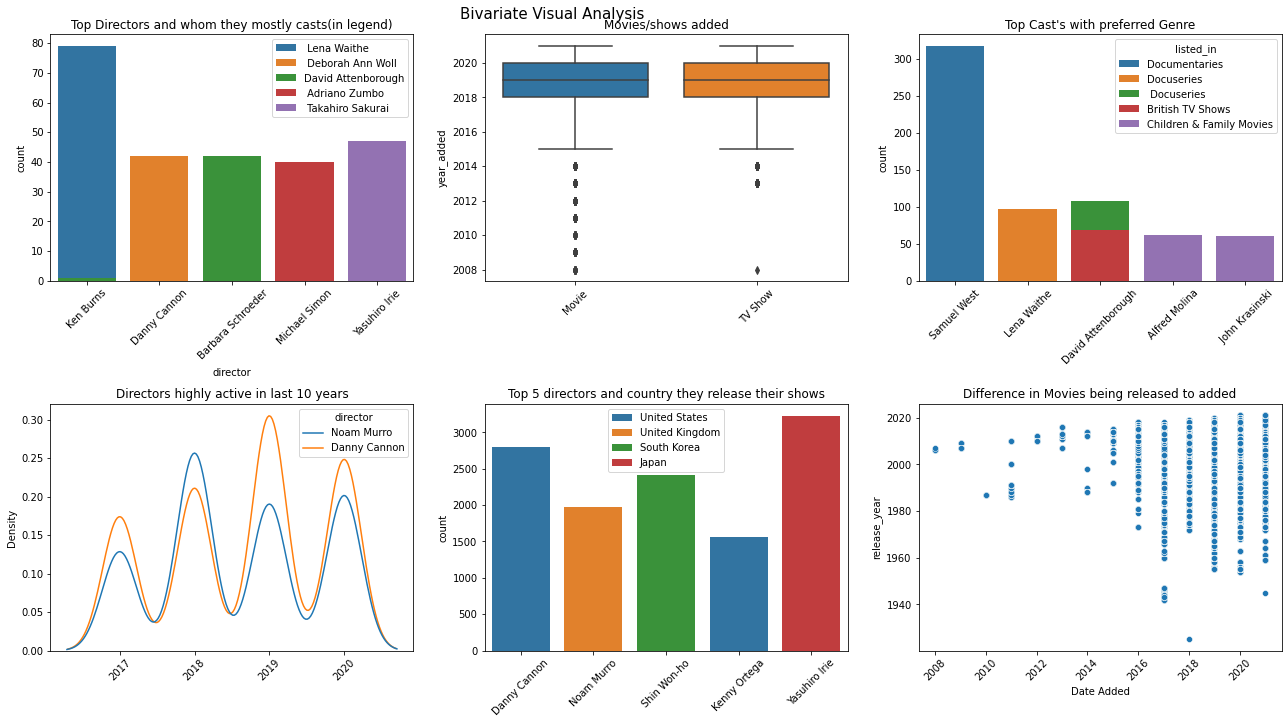

In [ ]:
fig = plt.figure(figsize = (18,10))

plt.subplot(2,3,1)
sns.countplot(x = 'director', data = top_dir_cast, hue = 'cast', dodge = False)
plt.title('Top Directors and whom they mostly casts(in legend)')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right')


plt.subplot(2,3,5)
sns.countplot(x = 'director',  data = top_dir_coun, hue = 'country', dodge = False)
plt.title('Top 5 directors and country they release their shows')
plt.xticks(rotation = 45)
plt.xlabel("")
plt.legend(loc = 'upper center')

plt.subplot(2,3,3)
sns.countplot(data = top_cast_gen, x ='cast', hue = 'listed_in', dodge=False)
plt.title("Top Cast's with preferred Genre")
plt.xticks(rotation = 45)
plt.xlabel("")


plt.subplot(2,3,4)
sns.kdeplot( x ='release_year', data = top_dir_ten_years, hue = 'director' )
plt.title('Directors highly active in last 10 years')
plt.xticks(rotation = 45)
plt.xlabel("")

plt.subplot(2,3,6)
sns.scatterplot( x ='year_added', y = 'release_year', data = data_refined)
plt.title('Difference in Movies being released to added')
plt.xticks(rotation = 45)
plt.xlabel("Date Added")

plt.subplot(2,3,2)
sns.boxplot( x = 'type', y ='year_added', data = data_refined)
plt.title('Movies/shows added')
plt.xticks(rotation = 45)
plt.xlabel("")



fig.suptitle("Bivariate Visual Analysis",  ha = 'right', va = 'bottom', fontsize = 15)
plt.tight_layout()
plt.show()

Using the above visual analysis on Bivariate Data, we can observe that:

1) Ken Burns works along with Lena Waithe (cast) and they both have release highest number of movies/shows.

2)Most of the movies and shows were added between 2018-2020.

3) Samuel West who have been seen in most movies/shows are listed in Documentaries.

4)Noam Murro and Danny Cannon have been actively releasing lots of movies in last 10 years.

5)Most of the movies are released in United States.

6) Samuel West one of the top casts(based on frequency) has been casted in lot of documentary movies/shows

# Business Insights 

1) Yasuhire Irie has directed most of TV Shows (His experitise lies in Anime series followed by International TV Shows)

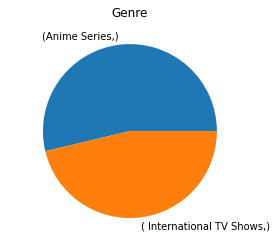

In [ ]:
data_refined.loc[(data_refined['director']=='Yasuhiro Irie'), ['listed_in']].value_counts().plot(kind='pie', title = 'Genre', label = " ")
plt.show()

2) Robert Rodriguez has directed most of the movies and genre he has directed mostly is Children & Family Movies.

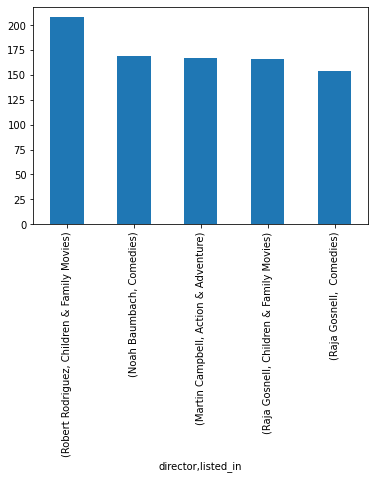

In [ ]:
data_refined.loc[(data_refined['type']=='Movie'),['director','listed_in']].value_counts().head().plot(kind='bar')
plt.show()

3) Most of the movies/shows are added for United States which suggest immense viewership and subscription. The preffered type is Movie specially (Dramas, Comedies, Children & Family Movies, Action % Adventure). The list is then followed by India and common genre is 'International Movies"

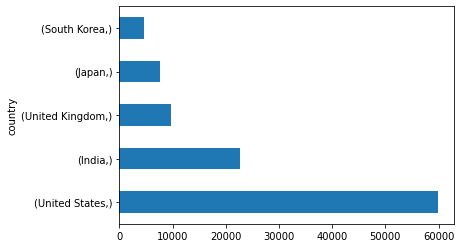

In [ ]:
data_refined[['country']].value_counts().head().plot(kind = 'barh')
plt.show()

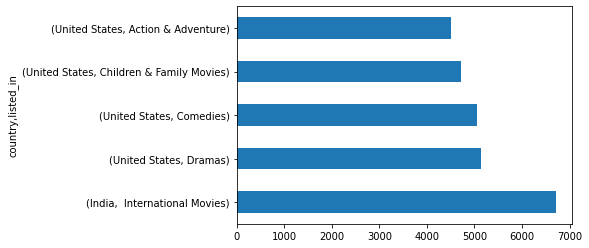

In [ ]:
data_refined[['country','listed_in']].value_counts().head().plot(kind = 'barh')
plt.show()

4) Netflix invests lots in International Movies, followed by Dramas & Comedies.


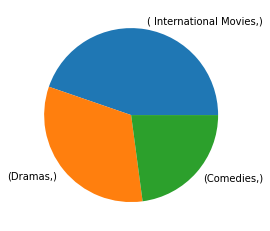

In [ ]:
data_refined[['listed_in']].value_counts().head(3).plot(kind = 'pie', label=" ")
plt.show()

5) Japan has more viewers an fan following for Anime Series

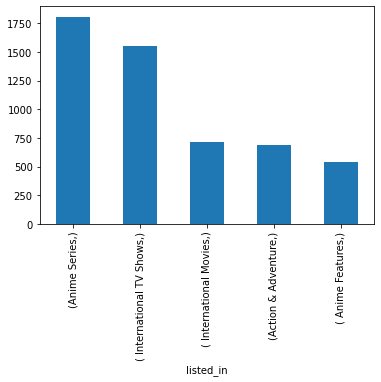

In [ ]:
data_refined.loc[(data_refined['country']=='Japan'),['listed_in']].value_counts().head().plot(kind='bar')
plt.show()

6) Most of the movies and shows were added between 2018-2020, which suggest addition of subscription world wide.

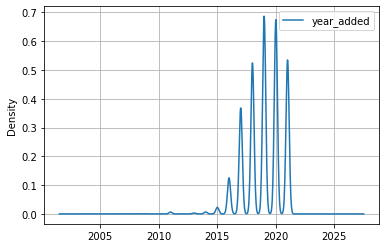

In [ ]:
data_refined[['year_added']].plot(kind = 'kde')
plt.grid()
plt.show()

# Recommendations

1) India seems to be next in line in terms of adding new movies, which directly proves increase in membership/subscription and most Indians moving to OTT platform. Netflix can offer flexible subscription to first time users and offer more variety of shows rather than international movies to target larger audience

2) International TV movies tops the list of Genre being added in Netflix, netflix should look into adding more quality content with similar Genre and focusing their recomendation based on Geography. 

3) Japan(one of the smallest country) in top 5 countries where movies are added seems to have huge Anime series fan following, however the content are limited to few directors. Netflix should open to add more content with different directors and keep thei customer happy.

4) Netflix should try introduce local movies in different countries as they have a very less number of viewership which suggest that they don't prefer international movies(one of the highest genre of movie added)
